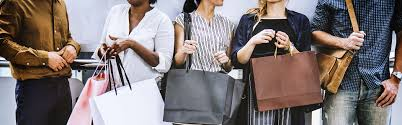

# What is propensity modelling?
Propensity modelling attempts to predict the likelihood that visitors, leads, and customers will perform certain actions. It’s a statistical approach that accounts for all the independent and confounding variables that affect said behavior.

So, for example, propensity modelling can help a marketing team predict the likelihood that a lead/approach will convert to a customer, that a customer will churn or an email recipient will unsubscribe.

The propensity score, then, is the probability that the visitor, lead, or customer will perform a certain action. 






# Content

In this project, we are interested in finding the propensity for a customer to perform a certain action, for example, to buy a product. In other words, we are trying to carry out a predictive analysis that tells us how likely it is that a customer will perform that action.
This dataset represents a day's worth of visit to a fictional website. Each row represents a unique customer that is identified by their unique UserID. The columns represent feature of the users visit (such as the device they were using) and things the user did on the website in that day. These features will most likely be different for every website, but in this dataset a few of the features we consider are:

- basketadddetail: Did the customer add a product to their shopping basket from the product detail page?
- sign_in: Did the customer sign in to the website?
- saw_homepage: Did the customer visit the website's homepage?
- returning_user: Is this visitor new, or returning?
- we also have a feature showing whether the customer placed an order (ordered), which is what we predict on.

## Let's import all the libraries we are going to be using

In [1]:
%%HTML 
<style type="text/css">
table.dataframe td, table.dataframe th {
     border: 1px black solid !important;
    color: black !important;}
</style>

In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
%%HTML 
<style type="text/css">
table.dataframe td, table.dataframe th {
     border: 1px black solid !important;
    color: black !important;}
</style>

In [12]:
data = pd.read_csv("training_sample.csv")
test_data = pd.read_csv("testing_sample.csv")

In [3]:
#Looking into the dataset
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


## Let's explore the data

In [4]:
data.shape

(455401, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [6]:
data.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

We can see that ordered is our target column(prediction column) and we can see our dataset is full of categorical
variables and everything is in integer datatype only userid is an object datatype

In [8]:
#Lets check whether there are any null values
data.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

### Looking for Correlation among the columns

<AxesSubplot:>

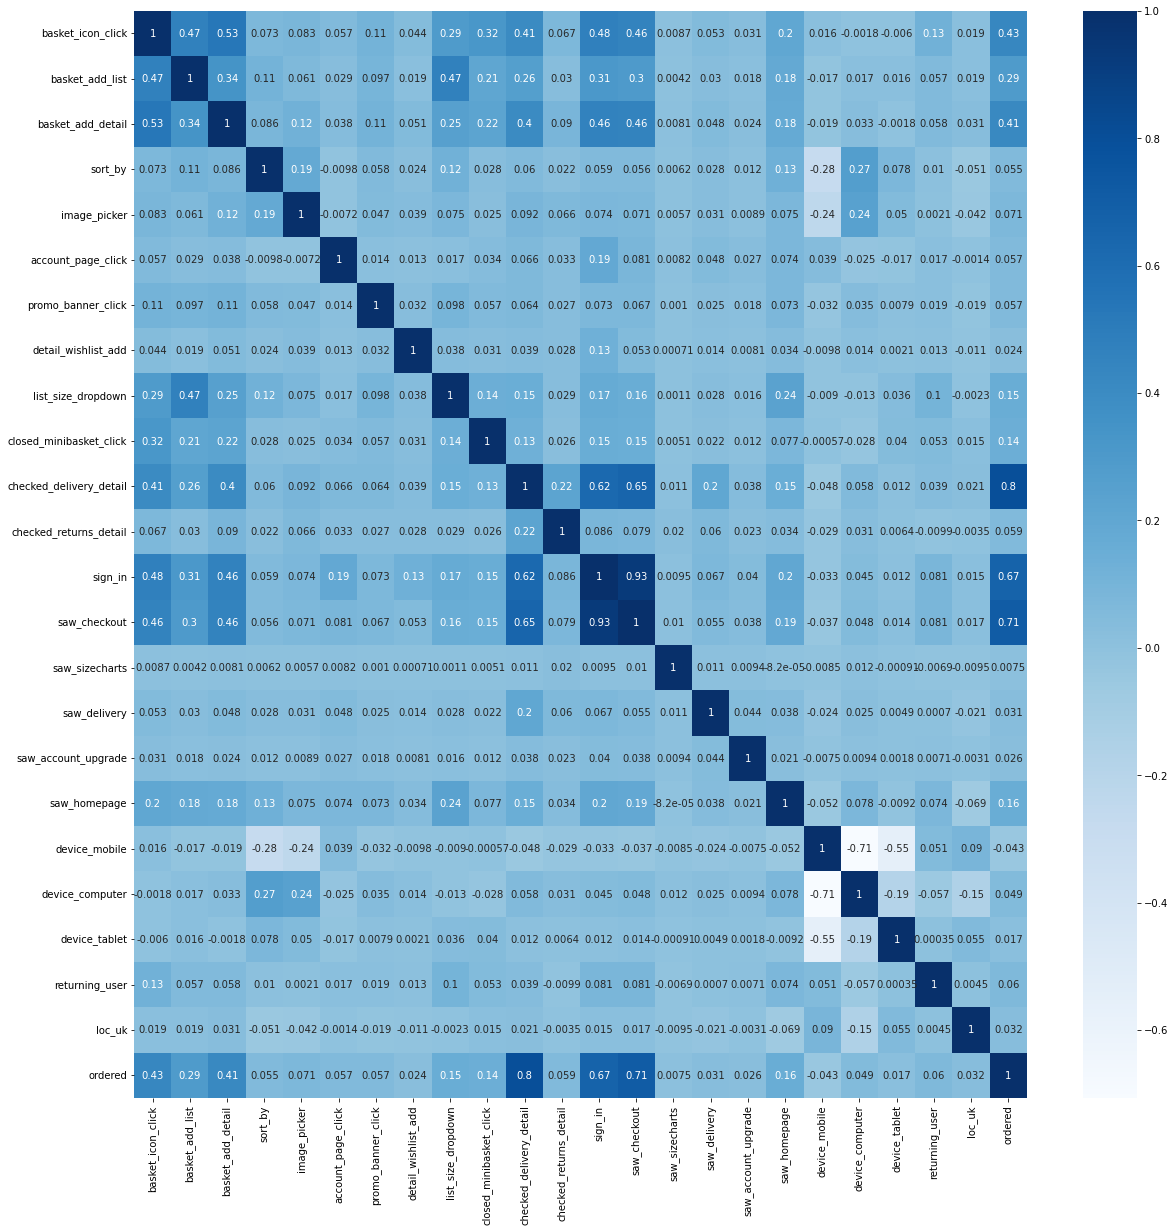

In [9]:
cor=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap="Blues")

In [10]:
cor['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

Lets remove the columns device_mobile,device_computer,device_tablet because they don't contribute to our prediction and are weakly correlated.

In [24]:
data=data.drop(['device_mobile','device_computer','device_tablet'],axis=1)
test = test_data.drop(['device_mobile','device_computer','device_tablet','UserID','ordered'],axis=1)


In [23]:
print(x.columns)
print("\n", test.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'returning_user', 'loc_uk'],
      dtype='object')

 Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'returning_user', 'loc_uk', 'ordered'],
      dtype='object')


## Applying ML Techniques

In [14]:
y=data['ordered']
x=data.drop(['ordered','UserID'],axis=1)  #UserID is a string datatype and it has no useful info for model tarining

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1) #splitting the dataset

In [16]:
model=LogisticRegression()
sgd_clf = SGDClassifier(random_state = 1)
forest_reg = RandomForestClassifier(random_state=10)
Naive_Bayes = GaussianNB()

**Training the model with our dataset**

In [17]:
model = model.fit(x_train,y_train)
sgd_clf = sgd_clf.fit(x_train, y_train)
forest_reg = forest_reg.fit(x_train,y_train)
Naive_Bayes.fit(x_train, y_train)

GaussianNB()

**The prediction**

In [18]:
logpred=model.predict(x_test)
sgdpred = sgd_clf.predict(x_test)
forest_pred = forest_reg.predict(x_test)
GNB_pred = Naive_Bayes.predict(x_test)


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print("True Positives and Negatives, False Positives and Negatives \n")
print("Logistic Regression: \n",confusion_matrix(y_test,logpred))
print(" \n")
print("Stochastic Gradient Descent: \n",confusion_matrix(y_test,sgdpred))
print(" \n")
print("Random Forest: \n",confusion_matrix(y_test,forest_pred))
print(" \n")
print("Gaussian Naive Bayes: \n" ,confusion_matrix(y_test,GNB_pred))

True Positives and Negatives, False Positives and Negatives 

Logistic Regression: 
 [[108364    731]
 [    61   4695]]
 

Stochastic Gradient Descent: 
 [[108333    762]
 [    72   4684]]
 

Random Forest: 
 [[108368    727]
 [   107   4649]]
 

Gaussian Naive Bayes: 
 [[107779   1316]
 [    59   4697]]


## Accuracy Score
It should be noted that accuracy score alone does not really give a true performance of our model.

In [21]:
print("Logistic Regression: ", accuracy_score(y_test,logpred))
print("--- \n")
print("SGD : ",accuracy_score(y_test,sgdpred))
print("--- \n")
print("Random forest: ",accuracy_score(y_test,forest_pred))
print("--- \n")
print("GNB: ",accuracy_score(y_test,GNB_pred))

Logistic Regression:  0.9930435393628514
--- 

SGD :  0.992674636147245
--- 

Random forest:  0.992674636147245
--- 

GNB:  0.9879228113938393
